In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = np.loadtxt('xor.txt', delimiter=',')
trainX = dataset[:, 0:2]
trainY = dataset[:, 2]

In [ ]:
trainX

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [ ]:
trainY

array([0., 1., 1., 0.])

In [7]:
def XORNeuralNetwork(TrainX, TrainY, ActivationFunction, Optimizer, Loss, LearningRate, Epochs, BatchSize):
    # Model Building
    from tensorflow.keras.layers import Input, Dense
    from tensorflow.keras.models import Model

    input_tensor = Input(shape=(2,))
    hidden_tensor = Dense(2, activation=ActivationFunction)(input_tensor)
    output_tensor = Dense(1, activation=ActivationFunction)(hidden_tensor)

    # Model Compiling and Learning
    model = Model(input_tensor, output_tensor)
    model.compile(optimizer=Optimizer(learning_rate=LearningRate), loss=Loss)
    history = model.fit(TrainX, TrainY, epochs=Epochs, batch_size=BatchSize)

    # Model Output
    output = model.predict(TrainX)
    output = np.concatenate((TrainX, output), axis=1)

    metadata = {'Optimizer': Optimizer, 'Activation': ActivationFunction, 'Loss': Loss, 'learning_rate': LearningRate, 'Epochs': Epochs, 'BatchSize': BatchSize}

    return (history, metadata, output)

In [12]:
from tensorflow.keras.optimizers import SGD, Adam
Optimizers = [SGD, Adam]
Activations = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']

Histories = []
for Optimizer in Optimizers:
    for Activation in Activations:
        Histories.append(XORNeuralNetwork(trainX,trainY, Activation, Optimizer, 'mean_squared_error', 0.1, 500, 1))

Streaming output truncated to the last 5000 lines.
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2591
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2585
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2580
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2575
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2571
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2564
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2561
Epoch 13/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 14/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2556
Epoch 15/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2553
Epoch 1

In [10]:
def PlotLoss(histories):
    import matplotlib.pyplot as plt
    import pandas as pd

    for result in histories:
        pd.DataFrame(result[0].history).plot(figsize=(8, 5))
        plt.title(f'{result[1]["Optimizer"].__name__} - {result[1]["Activation"]}')
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    plt.show()

def printOutput(Histories):
    for result in Histories:
        print(f'{result[1]["Optimizer"].__name__} - {result[1]["Activation"]}')
        print(result[2])
        print()

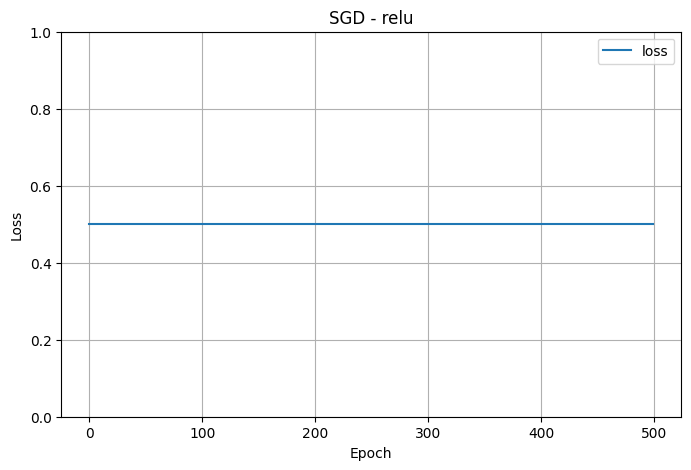

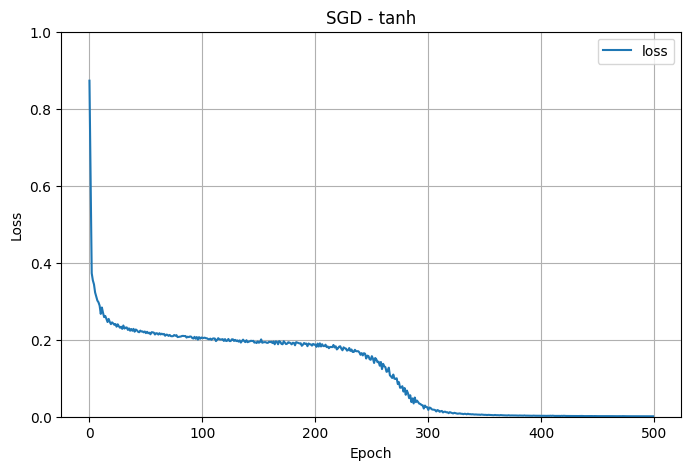

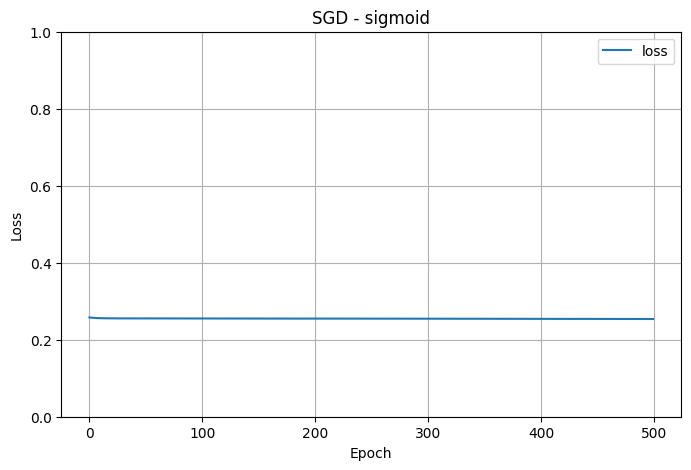

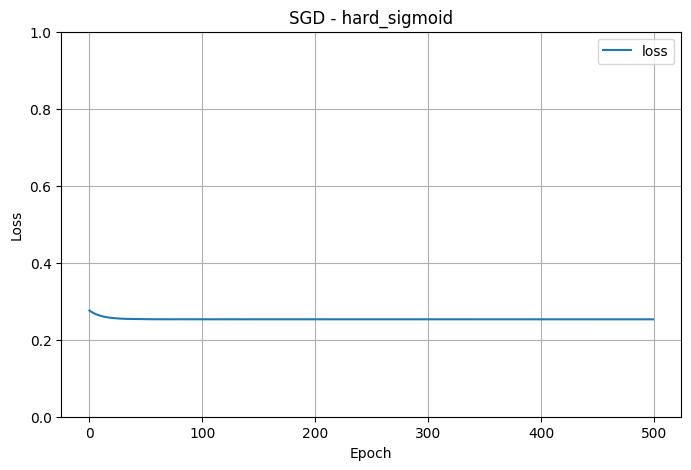

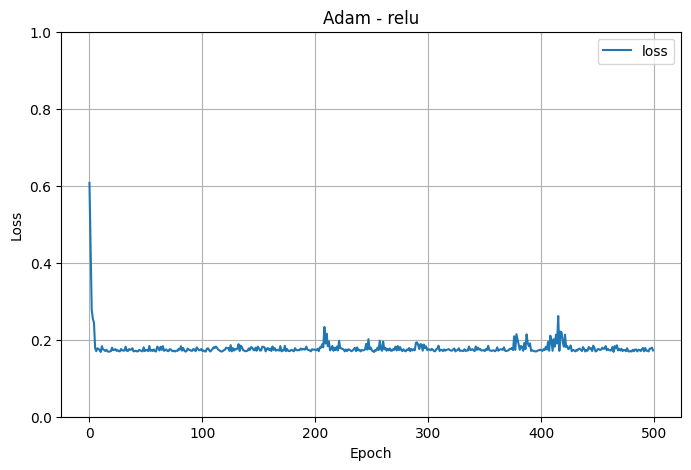

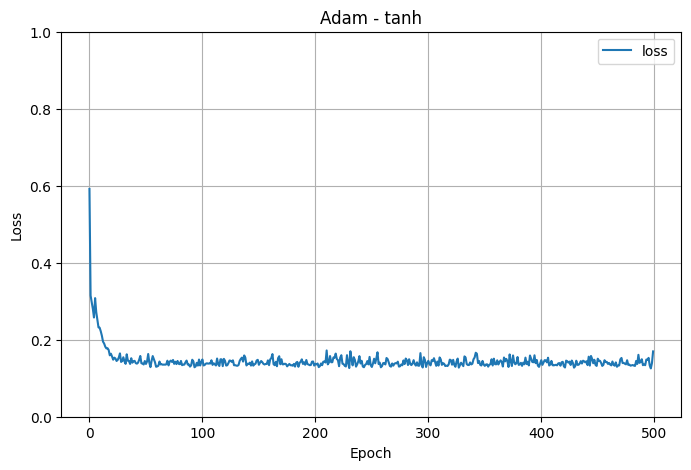

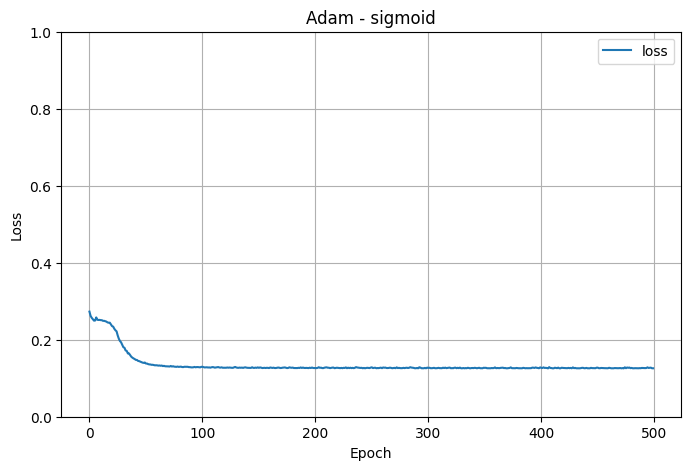

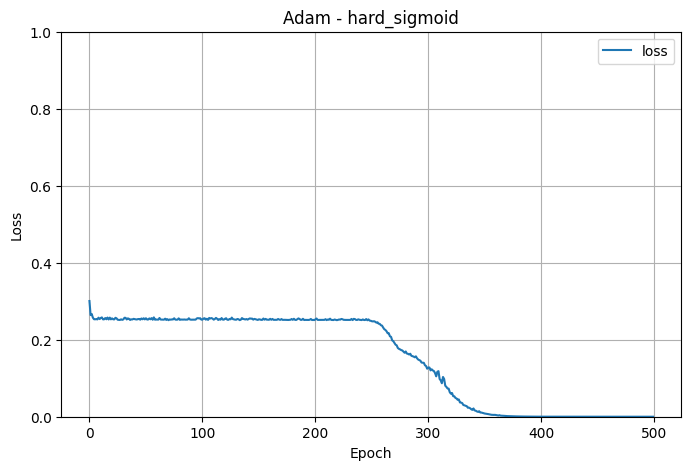

In [11]:
PlotLoss(Histories)

In [13]:
printOutput(Histories)

SGD - relu
[[0.         0.         0.386841  ]
 [0.         1.         1.08162379]
 [1.         0.         0.386841  ]
 [1.         1.         0.386841  ]]

SGD - tanh
[[ 0.00000000e+00  0.00000000e+00  3.50952148e-04]
 [ 0.00000000e+00  1.00000000e+00  9.54721212e-01]
 [ 1.00000000e+00  0.00000000e+00  9.55940962e-01]
 [ 1.00000000e+00  1.00000000e+00 -8.71052034e-03]]

SGD - sigmoid
[[0.         0.         0.47043103]
 [0.         1.         0.57093751]
 [1.         0.         0.4511244 ]
 [1.         1.         0.5010556 ]]

SGD - hard_sigmoid
[[0.         0.         0.4957799 ]
 [0.         1.         0.50000274]
 [1.         0.         0.50294906]
 [1.         1.         0.50717193]]

Adam - relu
[[0.         0.         0.3937887 ]
 [0.         1.         0.86319172]
 [1.         0.         0.3937887 ]
 [1.         1.         0.3937887 ]]

Adam - tanh
[[0.         0.         0.01242889]
 [0.         1.         0.99040073]
 [1.         0.         0.99022871]
 [1.         1.        